In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import chart_studio.plotly as py
import datetime as dt

In [2]:
df1 = pd.read_csv("GCLT1.csv", low_memory = False,index_col = "DECISION_DATE")
df2 = pd.read_csv("GCLT2.csv", low_memory = False,index_col = "DECISION_DATE")

In [3]:
df = pd.concat([df1,df2],axis = 0)

In [4]:
df = df.reset_index()

In [5]:
df["MONTH"] = pd.to_datetime(df["DECISION_DATE"]).apply(lambda x:x.month)

In [6]:
df["YEAR"] = pd.to_datetime(df["DECISION_DATE"]).apply(lambda x:x.year)

In [7]:
df = df.set_index("DECISION_DATE")

In [8]:
# changing certified and certified expired to 1: 1 is good. and withdrawn and denied to 0: 0 is bad
df["CASE_STATUS"] = df["CASE_STATUS"].replace(["CERTIFIED-EXPIRED","CERTIFIED"],[1,1]).replace(["WITHDRAWN","DENIED"],[0,0])

In [9]:
# Cleaning up salary offered, and salary PW: if not number then null
df["WAGE_OFFER_FROM_9089"] = pd.to_numeric(df["WAGE_OFFER_FROM_9089"], errors='coerce')
df["WAGE_OFFER_TO_9089"] = pd.to_numeric(df["WAGE_OFFER_TO_9089"], errors='coerce')
df["PW_AMOUNT_9089"] = pd.to_numeric(df["PW_AMOUNT_9089"], errors='coerce')

In [10]:
# FIXING THE PW and SALARY UNIT OF PAY
df["PW_UNIT_OF_PAY_9089"] = df["PW_UNIT_OF_PAY_9089"].replace(["HOUR","YEAR","WEEK","MONTH","BI-WEEKLY"],["HR","YR","WK","MTH","BI"])
df["WAGE_OFFER_UNIT_OF_PAY_9089"] = df["WAGE_OFFER_UNIT_OF_PAY_9089"].replace(["HOUR","YEAR","WEEK","MONTH","BI-WEEKLY"],["HR","YR","WK","MTH","BI"])

In [11]:
# Annualized Salaries: Actual Salary
def annual(row):
    if row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "YR":
        return 1
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "MTH": 
        return 12
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "WK": 
        return 52
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "BI": 
        return 26
    elif row["WAGE_OFFER_UNIT_OF_PAY_9089"] == "HR": 
        return 2080
mult = pd.DataFrame(df.apply(lambda row:annual(row), axis = 1))

In [12]:
mult.columns=["WAGE_OFFER_FROM_9089"]
mult

,WAGE_OFFER_FROM_9089
DECISION_DATE,
9/29/08,2080.0
11/29/07,1.0
7/10/08,2080.0
10/15/07,2080.0
9/30/08,2080.0
...,...
9/30/21,1.0
9/30/21,1.0
9/30/21,1.0


In [13]:
df["WO_A"] = pd.DataFrame(df["WAGE_OFFER_FROM_9089"])*mult

In [14]:
# Annualized Salaries: PW Salary
def annuali(row):
    if row["PW_UNIT_OF_PAY_9089"] == "YR":
        return 1
    elif row["PW_UNIT_OF_PAY_9089"] == "MTH": 
        return 12
    elif row["PW_UNIT_OF_PAY_9089"] == "WK": 
        return 52
    elif row["PW_UNIT_OF_PAY_9089"] == "BI": 
        return 26
    elif row["PW_UNIT_OF_PAY_9089"] == "HR": 
        return 2080
multi = pd.DataFrame(df.apply(lambda row:annuali(row), axis = 1))

In [15]:
multi.columns=["PW_AMOUNT_9089"]
multi

,PW_AMOUNT_9089
DECISION_DATE,
9/29/08,NaN
11/29/07,NaN
7/10/08,NaN
10/15/07,NaN
9/30/08,NaN
...,...
9/30/21,1.0
9/30/21,1.0
9/30/21,1.0


In [16]:
df["PW_A"] = pd.DataFrame(df["PW_AMOUNT_9089"])*multi

In [17]:
df["OW-PW"] = df["WO_A"] - df["PW_A"]

In [18]:
dforiginal = df

In [19]:
# each year needs a cut off
m07 = df[df["YEAR"] == 2007]["WO_A"].quantile(.985)
m08 = df[df["YEAR"] == 2008]["WO_A"].quantile(.985)
m09 = df[df["YEAR"] == 2009]["WO_A"].quantile(.985)
m10 = df[df["YEAR"] == 2010]["WO_A"].quantile(.985)
m11 = df[df["YEAR"] == 2011]["WO_A"].quantile(.985)
m12 = df[df["YEAR"] == 2012]["WO_A"].quantile(.985)
m13 = df[df["YEAR"] == 2013]["WO_A"].quantile(.985)
m14 = df[df["YEAR"] == 2014]["WO_A"].quantile(.985)
m15 = df[df["YEAR"] == 2015]["WO_A"].quantile(.985)
m16 = df[df["YEAR"] == 2016]["WO_A"].quantile(.985)
m17 = df[df["YEAR"] == 2017]["WO_A"].quantile(.985)
m18 = df[df["YEAR"] == 2018]["WO_A"].quantile(.985)
m19 = df[df["YEAR"] == 2019]["WO_A"].quantile(.985)
m20 = df[df["YEAR"] == 2020]["WO_A"].quantile(.985)
m21 = df[df["YEAR"] == 2021]["WO_A"].quantile(.985)

In [20]:
m107 = df[df["YEAR"] == 2007]["PW_A"].quantile(.985)
m108 = df[df["YEAR"] == 2008]["PW_A"].quantile(.985)
m109 = df[df["YEAR"] == 2009]["PW_A"].quantile(.985)
m110 = df[df["YEAR"] == 2010]["PW_A"].quantile(.985)
m111 = df[df["YEAR"] == 2011]["PW_A"].quantile(.985)
m112 = df[df["YEAR"] == 2012]["PW_A"].quantile(.985)
m113 = df[df["YEAR"] == 2013]["PW_A"].quantile(.985)
m114 = df[df["YEAR"] == 2014]["PW_A"].quantile(.985)
m115 = df[df["YEAR"] == 2015]["PW_A"].quantile(.985)
m116 = df[df["YEAR"] == 2016]["PW_A"].quantile(.985)
m117 = df[df["YEAR"] == 2017]["PW_A"].quantile(.985)
m118 = df[df["YEAR"] == 2018]["PW_A"].quantile(.985)
m119 = df[df["YEAR"] == 2019]["PW_A"].quantile(.985)
m120 = df[df["YEAR"] == 2020]["PW_A"].quantile(.985)
m121 = df[df["YEAR"] == 2021]["PW_A"].quantile(.985)

In [21]:
df["WO_A"] = np.where((df["YEAR"] == 2007) & (df["WO_A"] > m07),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2008) & (df["WO_A"] > m08),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2009) & (df["WO_A"] > m09),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2010) & (df["WO_A"] > m10),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2011) & (df["WO_A"] > m11),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2012) & (df["WO_A"] > m12),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2013) & (df["WO_A"] > m13),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2014) & (df["WO_A"] > m14),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2015) & (df["WO_A"] > m15),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2016) & (df["WO_A"] > m16),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2017) & (df["WO_A"] > m17),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2018) & (df["WO_A"] > m18),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2019) & (df["WO_A"] > m19),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2020) & (df["WO_A"] > m20),96260265,df["WO_A"])
df["WO_A"] = np.where((df["YEAR"] == 2021) & (df["WO_A"] > m21),96260265,df["WO_A"])
df["PW_A"] = np.where((df["YEAR"] == 2007) & (df["PW_A"] > m107),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2008) & (df["PW_A"] > m108),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2009) & (df["PW_A"] > m109),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2010) & (df["PW_A"] > m110),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2011) & (df["PW_A"] > m111),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2012) & (df["PW_A"] > m112),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2013) & (df["PW_A"] > m113),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2014) & (df["PW_A"] > m114),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2015) & (df["PW_A"] > m115),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2016) & (df["PW_A"] > m116),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2017) & (df["PW_A"] > m117),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2018) & (df["PW_A"] > m118),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2019) & (df["PW_A"] > m119),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2020) & (df["PW_A"] > m120),96260265,df["PW_A"])
df["PW_A"] = np.where((df["YEAR"] == 2021) & (df["PW_A"] > m121),96260265,df["PW_A"])

In [22]:
df = df[df["PW_A"]!= 96260265]
df = df[df["WO_A"]!= 96260265]

In [23]:
df.loc[df["EMPLOYER_STATE"].str.contains("alabama", case=False, na = False), "EMPLOYER_STATE"] = "AL"
df.loc[df["EMPLOYER_STATE"].str.contains("alaska", case=False, na = False), "EMPLOYER_STATE"] = "AK"
df.loc[df["EMPLOYER_STATE"].str.contains("arizona", case=False, na = False), "EMPLOYER_STATE"] = "AZ"
df.loc[df["EMPLOYER_STATE"].str.contains("arkansas", case=False, na = False), "EMPLOYER_STATE"] = "AR"
df.loc[df["EMPLOYER_STATE"].str.contains("california", case=False, na = False), "EMPLOYER_STATE"] = "CA"
df.loc[df["EMPLOYER_STATE"].str.contains("colorado", case=False, na = False), "EMPLOYER_STATE"] = "CO"
df.loc[df["EMPLOYER_STATE"].str.contains("connecticut", case=False, na = False), "EMPLOYER_STATE"] = "CT"
df.loc[df["EMPLOYER_STATE"].str.contains("delaware", case=False, na = False), "EMPLOYER_STATE"] = "DE"
df.loc[df["EMPLOYER_STATE"].str.contains("Florida", case=False, na = False), "EMPLOYER_STATE"] = "FL"
df.loc[df["EMPLOYER_STATE"].str.contains("georgia", case=False, na = False), "EMPLOYER_STATE"] = "GA"
df.loc[df["EMPLOYER_STATE"].str.contains("hawaii", case=False, na = False), "EMPLOYER_STATE"] = "HI"
df.loc[df["EMPLOYER_STATE"].str.contains("idaho", case=False, na = False), "EMPLOYER_STATE"] = "ID"
df.loc[df["EMPLOYER_STATE"].str.contains("illinois", case=False, na = False), "EMPLOYER_STATE"] = "IL"
df.loc[df["EMPLOYER_STATE"].str.contains("indiana", case=False, na = False), "EMPLOYER_STATE"] = "IN"
df.loc[df["EMPLOYER_STATE"].str.contains("iowa", case=False, na = False), "EMPLOYER_STATE"] = "IA"
df.loc[df["EMPLOYER_STATE"].str.contains("kansas", case=False, na = False), "EMPLOYER_STATE"] = "KS"
df.loc[df["EMPLOYER_STATE"].str.contains("kentucky", case=False, na = False), "EMPLOYER_STATE"] = "KY"
df.loc[df["EMPLOYER_STATE"].str.contains("louisiana", case=False, na = False), "EMPLOYER_STATE"] = "LA"
df.loc[df["EMPLOYER_STATE"].str.contains("maine", case=False, na = False), "EMPLOYER_STATE"] = "ME"
df.loc[df["EMPLOYER_STATE"].str.contains("maryland", case=False, na = False), "EMPLOYER_STATE"] = "MD"
df.loc[df["EMPLOYER_STATE"].str.contains("massachusetts", case=False, na = False), "EMPLOYER_STATE"] = "MA"
df.loc[df["EMPLOYER_STATE"].str.contains("michigan", case=False, na = False), "EMPLOYER_STATE"] = "MI"
df.loc[df["EMPLOYER_STATE"].str.contains("minnesota", case=False, na = False), "EMPLOYER_STATE"] = "MN"
df.loc[df["EMPLOYER_STATE"].str.contains("mississippi", case=False, na = False), "EMPLOYER_STATE"] = "MS"
df.loc[df["EMPLOYER_STATE"].str.contains("missouri", case=False, na = False), "EMPLOYER_STATE"] = "MO"
df.loc[df["EMPLOYER_STATE"].str.contains("montana", case=False, na = False), "EMPLOYER_STATE"] = "MT"
df.loc[df["EMPLOYER_STATE"].str.contains("nebraska", case=False, na = False), "EMPLOYER_STATE"] = "NE"
df.loc[df["EMPLOYER_STATE"].str.contains("nevada", case=False, na = False), "EMPLOYER_STATE"] = "NV"
df.loc[df["EMPLOYER_STATE"].str.contains("new hampshire", case=False, na = False), "EMPLOYER_STATE"] = "NH"
df.loc[df["EMPLOYER_STATE"].str.contains("new jersey", case=False, na = False), "EMPLOYER_STATE"] = "NJ"
df.loc[df["EMPLOYER_STATE"].str.contains("new york", case=False, na = False), "EMPLOYER_STATE"] = "NY"
df.loc[df["EMPLOYER_STATE"].str.contains("new mexico", case=False, na = False), "EMPLOYER_STATE"] = "NM"
df.loc[df["EMPLOYER_STATE"].str.contains("north carolina", case=False, na = False), "EMPLOYER_STATE"] = "NC"
df.loc[df["EMPLOYER_STATE"].str.contains("north dakota", case=False, na = False), "EMPLOYER_STATE"] = "ND"
df.loc[df["EMPLOYER_STATE"].str.contains("ohio", case=False, na = False), "EMPLOYER_STATE"] = "OH"
df.loc[df["EMPLOYER_STATE"].str.contains("oklahoma", case=False, na = False), "EMPLOYER_STATE"] = "OK"
df.loc[df["EMPLOYER_STATE"].str.contains("oregon", case=False, na = False), "EMPLOYER_STATE"] = "OR"
df.loc[df["EMPLOYER_STATE"].str.contains("pennsylvania", case=False, na = False), "EMPLOYER_STATE"] = "PA"
df.loc[df["EMPLOYER_STATE"].str.contains("rhode island", case=False, na = False), "EMPLOYER_STATE"] = "RI"
df.loc[df["EMPLOYER_STATE"].str.contains("south carolina", case=False, na = False), "EMPLOYER_STATE"] = "SC"
df.loc[df["EMPLOYER_STATE"].str.contains("south dakota", case=False, na = False), "EMPLOYER_STATE"] = "SD"
df.loc[df["EMPLOYER_STATE"].str.contains("tennessee", case=False, na = False), "EMPLOYER_STATE"] = "TN"
df.loc[df["EMPLOYER_STATE"].str.contains("texas", case=False, na = False), "EMPLOYER_STATE"] = "TX"
df.loc[df["EMPLOYER_STATE"].str.contains("utah", case=False, na = False), "EMPLOYER_STATE"] = "UT"
df.loc[df["EMPLOYER_STATE"].str.contains("vermont", case=False, na = False), "EMPLOYER_STATE"] = "VT"
df.loc[df["EMPLOYER_STATE"].str.contains("virginia", case=False, na = False), "EMPLOYER_STATE"] = "VA"
df.loc[df["EMPLOYER_STATE"].str.contains("washington", case=False, na = False), "EMPLOYER_STATE"] = "WA"
df.loc[df["EMPLOYER_STATE"].str.contains("west virginia", case=False, na = False), "EMPLOYER_STATE"] = "WV"
df.loc[df["EMPLOYER_STATE"].str.contains("wisconsin", case=False, na = False), "EMPLOYER_STATE"] = "WI"
df.loc[df["EMPLOYER_STATE"].str.contains("wyoming", case=False, na = False), "EMPLOYER_STATE"] = "WY"
df.loc[df["EMPLOYER_STATE"].str.contains("district of columbia", case=False, na = False), "EMPLOYER_STATE"] = "DC"
df.loc[df["EMPLOYER_STATE"].str.contains("puerto rico", case=False, na = False), "EMPLOYER_STATE"] = "PR"

In [24]:
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("alabama", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AL"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("alaska", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AK"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("arizona", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AZ"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("arkansas", case=False, na = False), "JOB_INFO_WORK_STATE"] = "AR"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("california", case=False, na = False), "JOB_INFO_WORK_STATE"] = "CA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("colorado", case=False, na = False), "JOB_INFO_WORK_STATE"] = "CO"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("connecticut", case=False, na = False), "JOB_INFO_WORK_STATE"] = "CT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("delaware", case=False, na = False), "JOB_INFO_WORK_STATE"] = "DE"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("Florida", case=False, na = False), "JOB_INFO_WORK_STATE"] = "FL"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("georgia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "GA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("hawaii", case=False, na = False), "JOB_INFO_WORK_STATE"] = "HI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("idaho", case=False, na = False), "JOB_INFO_WORK_STATE"] = "ID"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("illinois", case=False, na = False), "JOB_INFO_WORK_STATE"] = "IL"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("indiana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "IN"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("iowa", case=False, na = False), "JOB_INFO_WORK_STATE"] = "IA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("kansas", case=False, na = False), "JOB_INFO_WORK_STATE"] = "KS"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("kentucky", case=False, na = False), "JOB_INFO_WORK_STATE"] = "KY"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("louisiana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "LA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("maine", case=False, na = False), "JOB_INFO_WORK_STATE"] = "ME"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("maryland", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MD"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("massachusetts", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("michigan", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("minnesota", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MN"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("mississippi", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MS"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("missouri", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MO"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("montana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("nebraska", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NE"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("nevada", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NV"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new hampshire", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NH"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new jersey", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NJ"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new york", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NY"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("new mexico", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NM"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("north carolina", case=False, na = False), "JOB_INFO_WORK_STATE"] = "NC"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("north dakota", case=False, na = False), "JOB_INFO_WORK_STATE"] = "ND"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("ohio", case=False, na = False), "JOB_INFO_WORK_STATE"] = "OH"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("oklahoma", case=False, na = False), "JOB_INFO_WORK_STATE"] = "OK"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("oregon", case=False, na = False), "JOB_INFO_WORK_STATE"] = "OR"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("pennsylvania", case=False, na = False), "JOB_INFO_WORK_STATE"] = "PA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("rhode island", case=False, na = False), "JOB_INFO_WORK_STATE"] = "RI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("south carolina", case=False, na = False), "JOB_INFO_WORK_STATE"] = "SC"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("south dakota", case=False, na = False), "JOB_INFO_WORK_STATE"] = "SD"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("tennessee", case=False, na = False), "JOB_INFO_WORK_STATE"] = "TN"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("texas", case=False, na = False), "JOB_INFO_WORK_STATE"] = "TX"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("utah", case=False, na = False), "JOB_INFO_WORK_STATE"] = "UT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("vermont", case=False, na = False), "JOB_INFO_WORK_STATE"] = "VT"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("virginia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "VA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("washington", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WA"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("west virginia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WV"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("wisconsin", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("wyoming", case=False, na = False), "JOB_INFO_WORK_STATE"] = "WY"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("district of columbia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "DC"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("puerto rico", case=False, na = False), "JOB_INFO_WORK_STATE"] = "PR"

In [25]:
df.loc[df["EMPLOYER_STATE"].str.contains("mariana", case=False, na = False), "EMPLOYER_STATE"] = "MP"
df.loc[df["EMPLOYER_STATE"].str.contains("guam", case=False, na = False), "EMPLOYER_STATE"] = "GU"
df.loc[df["EMPLOYER_STATE"].str.contains("virgin", case=False, na = False), "EMPLOYER_STATE"] = "VI"
df.loc[df["EMPLOYER_STATE"].str.contains("marshall", case=False, na = False), "EMPLOYER_STATE"] = "MH"
df.loc[df["EMPLOYER_STATE"].str.contains("lower", case=False, na = False), "EMPLOYER_STATE"] = "GER"
df.loc[df["EMPLOYER_STATE"].str.contains("micronesia", case=False, na = False), "EMPLOYER_STATE"] = "FM"
df.loc[df["EMPLOYER_STATE"].str.contains("british", case=False, na = False), "EMPLOYER_STATE"] = "BC"
df.loc[df["EMPLOYER_STATE"].str.contains("or or", case=False, na = False), "EMPLOYER_STATE"] = "OR"
df.loc[df["EMPLOYER_STATE"].str.contains("FL", case=False, na = False), "EMPLOYER_STATE"] = "FL"

In [26]:
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("mariana", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MP"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("guam", case=False, na = False), "JOB_INFO_WORK_STATE"] = "GU"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("virgin", case=False, na = False), "JOB_INFO_WORK_STATE"] = "VI"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("marshall", case=False, na = False), "JOB_INFO_WORK_STATE"] = "MH"
df.loc[df["JOB_INFO_WORK_STATE"].str.contains("micronesia", case=False, na = False), "JOB_INFO_WORK_STATE"] = "FM"

In [27]:
df["DISC_ST"] = np.where(df["EMPLOYER_STATE"]==df["JOB_INFO_WORK_STATE"], 0, 1)
df["DISC_CTY"] = np.where(df["EMPLOYER_CITY"]==df["JOB_INFO_WORK_CITY"], 0, 1)
df["DISC_UNIT"] = np.where(df["WAGE_OFFER_UNIT_OF_PAY_9089"]==df["PW_UNIT_OF_PAY_9089"], 0, 1)

In [28]:
df.drop("WAGE_OFFER_TO_9089", axis =1 , inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1147475 entries, 9/29/08 to 9/30/21
Data columns (total 22 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   CASE_STATUS                  1147475 non-null  int64  
 1   EMPLOYER_NAME                1147439 non-null  object 
 2   EMPLOYER_CITY                1147436 non-null  object 
 3   EMPLOYER_STATE               1147390 non-null  object 
 4   PW_LEVEL_9089                1076618 non-null  object 
 5   PW_AMOUNT_9089               1139066 non-null  float64
 6   PW_UNIT_OF_PAY_9089          1139702 non-null  object 
 7   WAGE_OFFER_FROM_9089         1144045 non-null  float64
 8   WAGE_OFFER_UNIT_OF_PAY_9089  1129241 non-null  object 
 9   JOB_INFO_WORK_CITY           1147120 non-null  object 
 10  JOB_INFO_WORK_STATE          1147137 non-null  object 
 11  COUNTRY_OF_CITZENSHIP        1147280 non-null  object 
 12  CLASS_OF_ADMISSION           1057117 non-

In [30]:
# EDA

In [31]:
df["EMPLOYER_NAME"].value_counts().nlargest(20)

MICROSOFT CORPORATION                            28827
COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION    24408
INTEL CORPORATION                                14666
GOOGLE LLC                                        9706
GOOGLE INC.                                       8380
APPLE INC.                                        7865
AMAZON CORPORATE LLC                              7645
INFOSYS LTD.                                      7313
CISCO SYSTEMS, INC.                               7107
FACEBOOK, INC.                                    6968
TATA CONSULTANCY SERVICES LIMITED                 6461
AMAZON.COM SERVICES, INC.                         5991
AMAZON.COM SERVICES LLC                           5449
ORACLE AMERICA, INC.                              5239
HCL AMERICA INC.                                  4578
DELOITTE CONSULTING LLP                           4432
QUALCOMM TECHNOLOGIES INC.                        3479
IBM CORPORATION                                   2892
SALESFORCE

In [32]:
df["EMPLOYER_NAME"].value_counts().nlargest(20).iplot(kind = "bar")

<AxesSubplot:title={'center':'0: rejection, 1: acceptance frequency over the years'}, xlabel='YEAR', ylabel='count'>

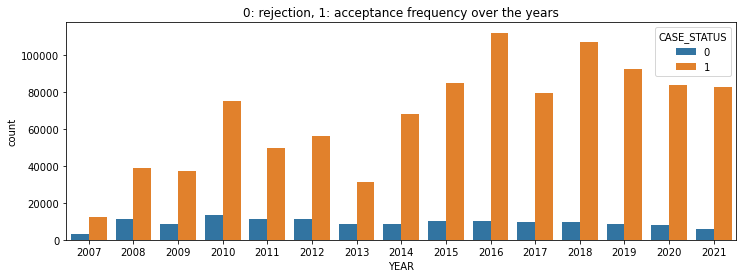

In [33]:
plt.figure(figsize = (12,4))
plt.title("0: rejection, 1: acceptance frequency over the years")
sns.countplot(x = "YEAR",hue = "CASE_STATUS",data = df)

In [34]:
df.groupby("YEAR")[["WO_A","PW_A"]].mean().iplot(kind = "bar")

In [35]:
df.groupby("YEAR")[["WO_A","PW_A"]].quantile(.25).iplot(kind = "bar")

In [36]:
df.groupby("YEAR")[["WO_A","PW_A"]].quantile(.75).iplot(kind = "bar")

In [37]:
df.groupby("YEAR")[["WO_A","PW_A"]].quantile(.5).iplot(kind = "bar")

In [38]:
df.groupby("YEAR")[["WO_A","PW_A"]].max().iplot(kind = "bar")

In [40]:
yr = df["YEAR"].unique().tolist()
yr.sort()

In [41]:
st.linregress(y = df.groupby("YEAR")["WO_A"].quantile(.25), x = yr)

LinregressResult(slope=2749.409285714285, intercept=-5472609.02142857, rvalue=0.8410964974262185, pvalue=8.527354634636005e-05, stderr=490.37340149122167, intercept_stderr=987614.303102401)

In [42]:
st.linregress(y = df.groupby("YEAR")["WO_A"].quantile(.5), x = yr)

LinregressResult(slope=3183.7387321428573, intercept=-6325990.098869048, rvalue=0.9417614165681715, pvalue=1.6076846821393858e-07, stderr=315.3030604243997, intercept_stderr=635021.82487904)

In [43]:
st.linregress(y = df.groupby("YEAR")["WO_A"].quantile(.75), x = yr)

LinregressResult(slope=3571.8028571428563, intercept=-7086729.24595238, rvalue=0.974987002221489, pvalue=7.167657836059388e-10, stderr=225.83017511329794, intercept_stderr=454823.01922529034)

In [44]:
st.linregress(y = df.groupby("YEAR")["PW_A"].quantile(.25), x = yr)

LinregressResult(slope=2140.2451785714284, intercept=-4252212.266309523, rvalue=0.7758959117098236, pvalue=0.0006735657796535921, stderr=482.638576166548, intercept_stderr=972036.3290536124)

In [45]:
st.linregress(y = df.groupby("YEAR")["PW_A"].quantile(.5), x = yr)

LinregressResult(slope=2888.930714285714, intercept=-5738855.150571428, rvalue=0.9209662396714153, pvalue=1.1116962009551907e-06, stderr=338.9908131374142, intercept_stderr=682729.06861735)

In [46]:
st.linregress(y = df.groupby("YEAR")["PW_A"].quantile(.75), x = yr)

LinregressResult(slope=3167.4592857142848, intercept=-6281522.134761903, rvalue=0.9517143042475592, pvalue=4.8716408300303556e-08, stderr=283.3675645612642, intercept_stderr=570703.5882145157)

In [97]:
acy = df.groupby("YEAR")["CASE_STATUS"].value_counts()
acyper = acy.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))

<AxesSubplot:xlabel='YEAR,CASE_STATUS'>

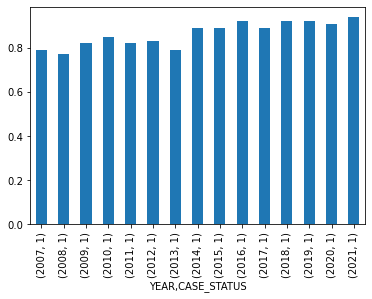

In [117]:
acyper[0:30:2].plot(kind = "bar")

In [124]:
acceptyear = pd.DataFrame([acyper[0:30:2].values,yr]).transpose()
st.linregress(y = acceptyear[0],x = acceptyear[1])

LinregressResult(slope=0.011285714285714284, intercept=-21.866095238095234, rvalue=0.8968976246411867, pvalue=5.896651017424682e-06, stderr=0.0015433725906039432, intercept_stderr=3.108359549807162)

In [129]:
st.linregress(y = df.dropna()["CASE_STATUS"], x = df.dropna()["WO_A"])

LinregressResult(slope=1.4198000379899585e-06, intercept=0.771523209145548, rvalue=0.1721233824247633, pvalue=0.0, stderr=8.208338716647574e-09, intercept_stderr=0.0008112991444047638)

In [140]:
st.linregress(x = df.groupby("YEAR")["WO_A"].quantile(.5), y = acceptyear[0])

LinregressResult(slope=3.0474088119110497e-06, intercept=0.6010742218394445, rvalue=0.8187306874783338, pvalue=0.00018955768429220577, stderr=5.927401083955511e-07, intercept_stderr=0.051740498168456994)

In [47]:
allapp_code = pd.DataFrame(df["PW_SOC_CODE"].value_counts()[:15]).reset_index()
allapp_code.columns = ["AACODE","COUNT AAC"]

In [48]:
goodcode = pd.DataFrame(df[df["CASE_STATUS"]==1]["PW_SOC_CODE"].value_counts()[:15]).reset_index()
goodcode.columns = ["GCODE","COUNT GC"]

In [49]:
pd.concat([allapp_code,goodcode], axis = 1)

,AACODE,COUNT AAC,GCODE,COUNT GC
0,15-1132,255164,15-1132,240281
1,15-1121,72520,15-1121,68384
2,15-1133,70102,15-1133,66971
3,15-1031,52133,15-1031,45348
4,17-2072,33156,17-2072,30654
5,15-1051,26917,15-1199,24710
6,15-1199,25781,15-1051,22538
7,11-3021,22819,11-3021,20585
8,15-1032,20396,15-1032,17001
9,17-2141,16915,17-2141,15527


In [50]:
df["PW_UNIT_OF_PAY_9089"].unique()

array([nan, 'HR', 'YR', 'WK', 'BI', 'MTH'], dtype=object)

<AxesSubplot:title={'center':'0: rejection, 1: acceptance frequency over the years'}, xlabel='PW_UNIT_OF_PAY_9089', ylabel='count'>

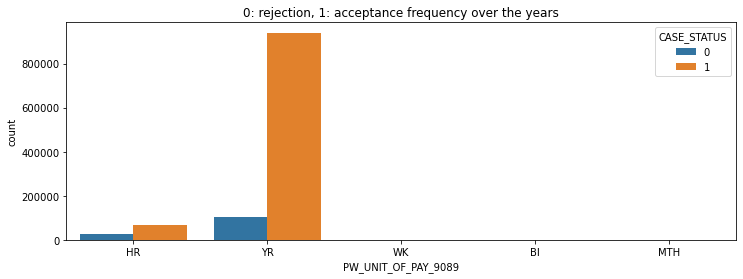

In [51]:
plt.figure(figsize = (12,4))
plt.title("0: rejection, 1: acceptance frequency over the years")
sns.countplot(x = "PW_UNIT_OF_PAY_9089",hue = "CASE_STATUS",data = df)

In [52]:
yrw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR"])
mthw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH"])
biw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI"])
wkw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK"])
hrw = len(df[(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")&(df["CASE_STATUS"]==1)])/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR"])

In [53]:
saw = (yrw+mthw+biw+wkw+hrw)/5

In [54]:
waw = ((len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR"])*yrw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH"])*mthw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI"])*biw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK"])*wkw)+
(len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR"])*hrw))/len(df[df["WAGE_OFFER_UNIT_OF_PAY_9089"].notna()])

In [55]:
overallw = pd.DataFrame([yrw,mthw,biw,wkw,hrw,saw,waw]).transpose()
overallw.columns = ["YR S%", "MTH S%", "BI S%","WK S%", "HR S%","AVG S%", "WAVG S%"]
overallw

,YR S%,MTH S%,BI S%,WK S%,HR S%,AVG S%,WAVG S%
0,0.907553,0.675972,0.578947,0.515957,0.687499,0.673186,0.888708


<AxesSubplot:xlabel='YEAR', ylabel='count'>

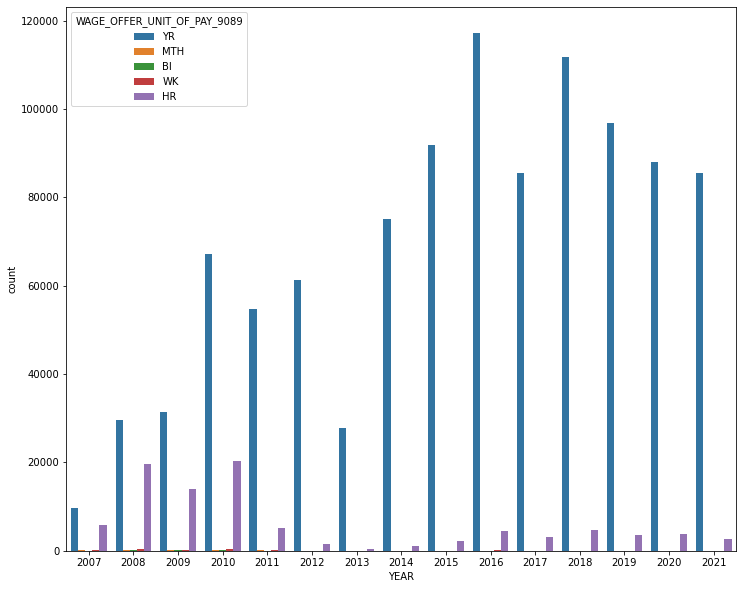

In [144]:
plt.figure(figsize=(12,10))
sns.countplot(x = "YEAR", hue = "WAGE_OFFER_UNIT_OF_PAY_9089",data=df,hue_order=["YR","MTH","BI","WK","HR"])

In [148]:
df.groupby("YEAR")["WAGE_OFFER_UNIT_OF_PAY_9089"].value_counts().groupby(level=0).transform(lambda x: (x / x.sum()).round(2))[:15]

YEAR  WAGE_OFFER_UNIT_OF_PAY_9089
2007  YR                             0.62
      HR                             0.37
      WK                             0.01
      MTH                            0.01
      BI                             0.00
2008  YR                             0.59
      HR                             0.39
      WK                             0.01
      MTH                            0.00
      BI                             0.00
2009  YR                             0.68
      HR                             0.31
      WK                             0.00
      MTH                            0.00
      BI                             0.00
Name: WAGE_OFFER_UNIT_OF_PAY_9089, dtype: float64

In [150]:
df.groupby("YEAR")["WAGE_OFFER_UNIT_OF_PAY_9089"].value_counts().groupby(level=0).transform(lambda x: (x / x.sum()).round(2))[49:]

YEAR  WAGE_OFFER_UNIT_OF_PAY_9089
2017  YR                             0.96
      HR                             0.04
      WK                             0.00
      MTH                            0.00
      BI                             0.00
2018  YR                             0.96
      HR                             0.04
      MTH                            0.00
      WK                             0.00
      BI                             0.00
2019  YR                             0.96
      HR                             0.04
      MTH                            0.00
      WK                             0.00
      BI                             0.00
2020  YR                             0.96
      HR                             0.04
      MTH                            0.00
      WK                             0.00
      BI                             0.00
2021  YR                             0.97
      HR                             0.03
      MTH                            0.00


In [155]:
unitaccept = pd.concat([pd.get_dummies(df.dropna()["WAGE_OFFER_UNIT_OF_PAY_9089"]),df.dropna()["CASE_STATUS"]],axis = 1)

In [158]:
unitaccept.corr()["CASE_STATUS"]

BI            -0.012456
HR            -0.137998
MTH           -0.013811
WK            -0.022096
YR             0.141120
CASE_STATUS    1.000000
Name: CASE_STATUS, dtype: float64

In [167]:
yr07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yr21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="YR")])
yrdf = pd.DataFrame([yr07,yr08,yr09,yr10,yr11,yr12,yr13,yr14,yr15,yr16,yr17,yr18,yr19,yr20,yr21])
yrdf.columns = ["YR S%"]

In [171]:
mth07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mth21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="MTH")])
mthdf = pd.DataFrame([mth07,mth08,mth09,mth10,mth11,mth12,mth13,mth14,mth15,mth16,mth17,mth18,mth19,mth20,mth21])
mthdf.columns = ["MTH S%"]

In [175]:
bi07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bi21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="BI")])
bidf = pd.DataFrame([bi07,bi08,bi09,bi10,bi11,bi12,bi13,bi14,bi15,bi16,bi17,bi18,bi19,bi20,bi21])
bidf.columns = ["BI S%"]

/var/folders/k2/43l3cwhj6w3_z0hm652mcjq40000gn/T/ipykernel_1258/2884934719.py:8: RuntimeWarning:

invalid value encountered in long_scalars



In [178]:
wk07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wk21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="WK")])
wkdf = pd.DataFrame([wk07,wk08,wk09,wk10,wk11,wk12,wk13,wk14,wk15,wk16,wk17,wk18,wk19,wk20,wk21])
wkdf.columns = ["WK S%"]

In [180]:
hr07 = df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr08 = df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr09 = df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr10 = df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr11 = df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr12 = df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr13 = df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr14 = df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr15 = df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr16 = df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr17 = df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr18 = df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr19 = df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr20 = df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hr21 = df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["WAGE_OFFER_UNIT_OF_PAY_9089"]=="HR")])
hrdf = pd.DataFrame([hr07,hr08,hr09,hr10,hr11,hr12,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21])
hrdf.columns = ["HR S%"]

In [204]:
yrunit = pd.concat([yrdf,mthdf,bidf,wkdf,hrdf],axis = 1)
yrunit.index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
yrunit = yrunit.fillna(0)

<AxesSubplot:ylabel='Count'>

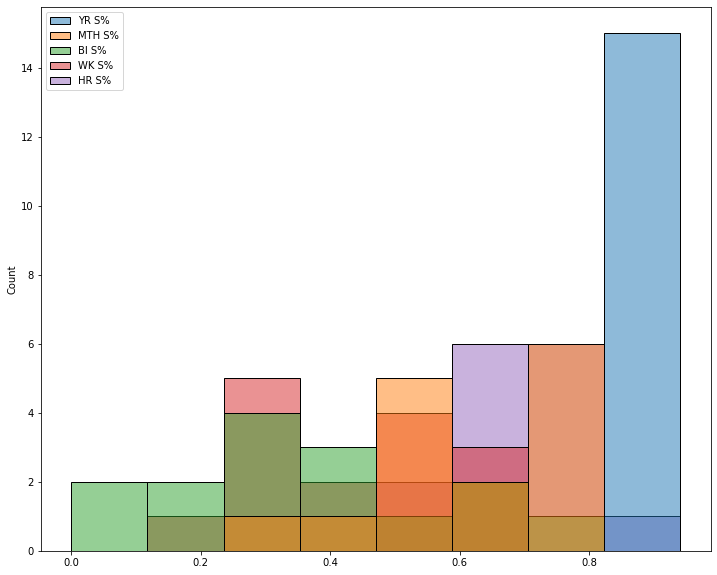

In [205]:
plt.figure(figsize=(12,10))
sns.histplot(data = yrunit)

<AxesSubplot:>

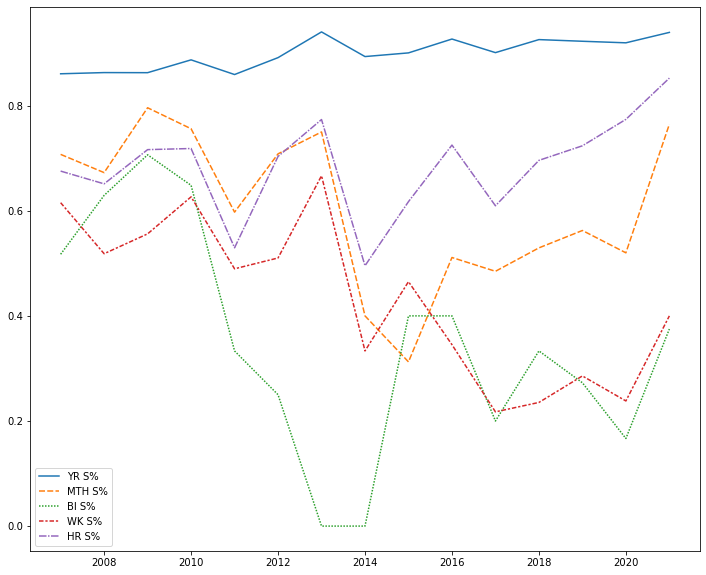

In [206]:
plt.figure(figsize=(12,10))
sns.lineplot(data = yrunit)

In [218]:
print("YR TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["YR S%"]))
print("\nMTH TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["MTH S%"]))
print("\nBI TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["BI S%"]))
print("\nWK TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["WK S%"]))
print("\nHR TREND OVER TIME:",st.linregress(yrunit.reset_index()["index"],yrunit.reset_index()["HR S%"]))

YR TREND OVER TIME: LinregressResult(slope=0.00535766180267656, intercept=-9.890748674463227, rvalue=0.8288179905658875, pvalue=0.00013406985317196058, stderr=0.0010031335433419218, intercept_stderr=2.0203156050339106)

MTH TREND OVER TIME: LinregressResult(slope=-0.013421806237568744, intercept=27.63637772827003, rvalue=-0.4119585764335135, pvalue=0.12706178876084606, stderr=0.008233806906346812, intercept_stderr=16.58292526666949)

BI TREND OVER TIME: LinregressResult(slope=-0.024646216867215742, intercept=49.986318875194435, rvalue=-0.5133518048526853, pvalue=0.050327514474668704, stderr=0.011427230935568564, intercept_stderr=23.01449606055718)

WK TREND OVER TIME: LinregressResult(slope=-0.026620632140871615, intercept=54.04748158159838, rvalue=-0.7851139684552886, pvalue=0.0005251108417282723, stderr=0.005824398088700662, intercept_stderr=11.730364742195409)

HR TREND OVER TIME: LinregressResult(slope=0.0073143763901101005, intercept=-14.047043223385286, rvalue=0.3517940652646688,

<AxesSubplot:xlabel='YEAR', ylabel='count'>

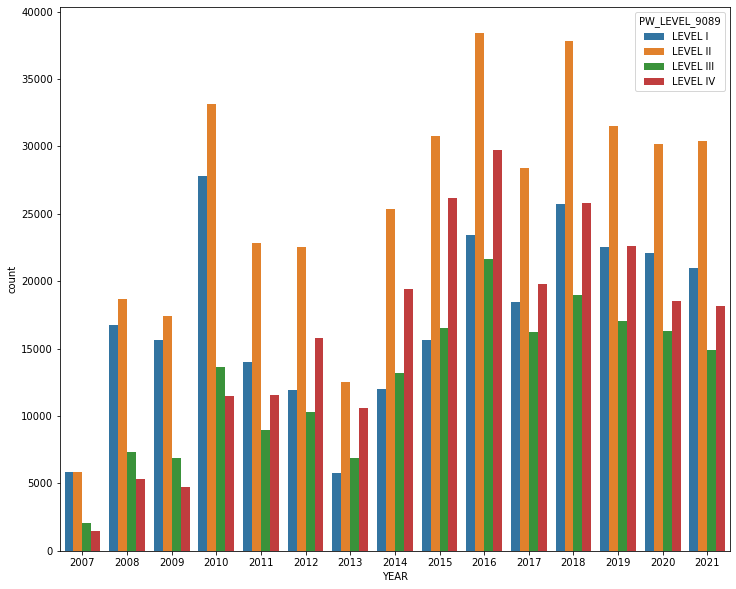

In [56]:
plt.figure(figsize=(12,10))
sns.countplot(x = "YEAR", hue = "PW_LEVEL_9089",data=df,hue_order=["LEVEL I","LEVEL II","LEVEL III","LEVEL IV"])

In [57]:
lo = df[df["PW_LEVEL_9089"] == "LEVEL I"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL I"])
lt = df[df["PW_LEVEL_9089"] == "LEVEL II"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL II"])
lth = df[df["PW_LEVEL_9089"] == "LEVEL III"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL III"])
lf = df[df["PW_LEVEL_9089"] == "LEVEL IV"]["CASE_STATUS"].sum()/len(df[df["PW_LEVEL_9089"] == "LEVEL IV"])

In [58]:
salw =(lo+lt+lth+lf)/4

In [59]:
walw = (len(df[df["PW_LEVEL_9089"] == "LEVEL I"])*lo+
len(df[df["PW_LEVEL_9089"] == "LEVEL II"])*lt+
len(df[df["PW_LEVEL_9089"] == "LEVEL III"])*lth+
len(df[df["PW_LEVEL_9089"] == "LEVEL IV"])*lf)/len(df[df["PW_LEVEL_9089"].notna()])

In [60]:
la = pd.DataFrame([lo,lt,lth,lf,salw,walw]).transpose()
la.columns=["LEVEL I","LEVEL II","LEVEL III","LEVEL IV","AVG","WAVG"]
la

,LEVEL I,LEVEL II,LEVEL III,LEVEL IV,AVG,WAVG
0,0.843937,0.89763,0.891358,0.901412,0.883584,0.884466


In [194]:
lv107 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv108 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv109 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv110 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv111 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv112 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv113 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv114 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv115 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv116 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv117 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv118 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv119 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv120 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv121 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL I")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL I")])
lv1df = pd.DataFrame([lv107,lv108,lv109,lv110,lv111,lv112,lv113,lv114,lv115,lv116,lv117,lv118,lv119,lv120,lv121])
lv1df.columns = ["LEVEL I S%"]

In [195]:
lv207 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv208 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv209 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv210 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv211 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv212 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv213 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv214 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv215 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv216 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv217 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv218 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv219 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv220 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv221 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL II")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL II")])
lv2df = pd.DataFrame([lv207,lv208,lv209,lv210,lv211,lv212,lv213,lv214,lv215,lv216,lv217,lv218,lv219,lv220,lv221])
lv2df.columns = ["LEVEL II S%"]

In [196]:
lv307 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv308 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv309 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv310 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv311 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv312 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv313 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv314 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv315 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv316 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv317 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv318 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv319 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv320 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv321 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL III")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL III")])
lv3df = pd.DataFrame([lv307,lv308,lv309,lv310,lv311,lv312,lv313,lv314,lv315,lv316,lv317,lv318,lv319,lv320,lv321])
lv3df.columns = ["LEVEL III S%"]

In [197]:
lv407 = df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2007)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv408 = df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2008)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv409 = df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2009)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv410 = df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2010)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv411 = df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2011)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv412 = df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2012)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv413 = df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2013)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv414 = df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2014)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv415 = df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2015)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv416 = df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2016)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv417 = df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2017)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv418 = df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2018)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv419 = df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2019)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv420 = df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2020)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv421 = df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL IV")]["CASE_STATUS"].sum()/len(df[(df["YEAR"]==2021)&(df["PW_LEVEL_9089"]=="LEVEL IV")])
lv4df = pd.DataFrame([lv407,lv408,lv409,lv410,lv411,lv412,lv413,lv414,lv415,lv416,lv417,lv418,lv419,lv420,lv421])
lv4df.columns = ["LEVEL IV S%"]

In [198]:
yrlevel = pd.concat([lv1df,lv2df,lv3df,lv4df],axis = 1)
yrlevel.index = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

<AxesSubplot:ylabel='Count'>

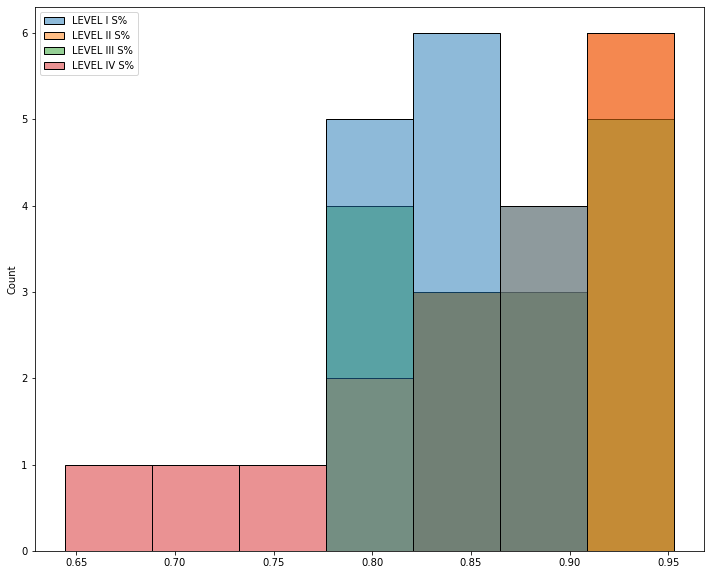

In [199]:
plt.figure(figsize=(12,10))
sns.histplot(data = yrlevel)

<AxesSubplot:>

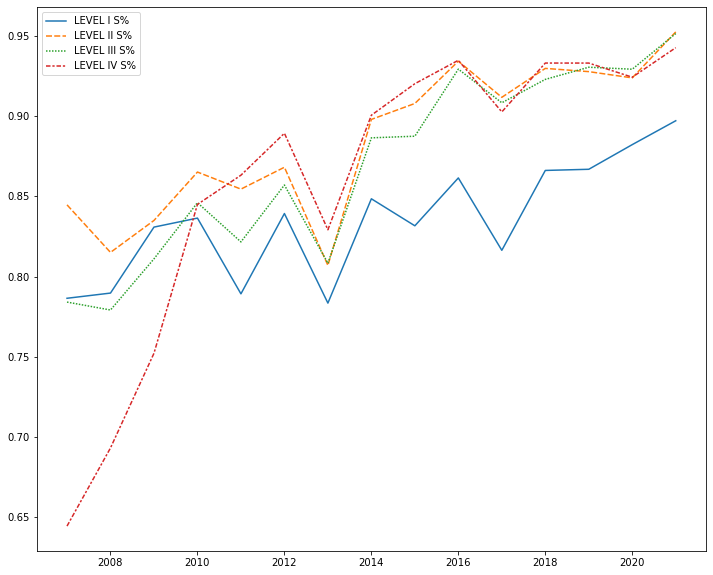

In [200]:
plt.figure(figsize=(12,10))
sns.lineplot(data = yrlevel)

In [219]:
print("LEVEL I TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL I S%"]))
print("\nLEVEL II TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL II S%"]))
print("\nLEVEL III TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL III S%"]))
print("\nLEVEL IV TREND OVER TIME:",st.linregress(yrlevel.reset_index()["index"],yrlevel.reset_index()["LEVEL IV S%"]))

LEVEL I TREND OVER TIME: LinregressResult(slope=0.0064448444208092875, intercept=-12.144792701872914, rvalue=0.7918009242726579, pvalue=0.00043506974561367313, stderr=0.0013788246347204074, intercept_stderr=2.7769592041060056)

LEVEL II TREND OVER TIME: LinregressResult(slope=0.00906031650629961, intercept=-17.362346561922102, rvalue=0.868081745624932, pvalue=2.7230835483054605e-05, stderr=0.0014370155098641366, intercept_stderr=2.8941558963148952)

LEVEL III TREND OVER TIME: LinregressResult(slope=0.012371972747032282, intercept=-24.046847377447076, rvalue=0.942368300436613, pvalue=1.5040867215799158e-07, stderr=0.0012182687779236643, intercept_stderr=2.453598964465922)

LEVEL IV TREND OVER TIME: LinregressResult(slope=0.017985639822000788, intercept=-35.362460973587886, rvalue=0.8598130444927724, pvalue=3.959441687691571e-05, stderr=0.002962365444044293, intercept_stderr=5.966217732563565)


In [201]:
levelaccept = pd.concat([pd.get_dummies(df.dropna()["PW_LEVEL_9089"]),df.dropna()["CASE_STATUS"]],axis = 1)

In [202]:
levelaccept.corr()["CASE_STATUS"]

LEVEL I       -0.062216
LEVEL II       0.024300
LEVEL III      0.007250
LEVEL IV       0.027179
CASE_STATUS    1.000000
Name: CASE_STATUS, dtype: float64

<AxesSubplot:xlabel='DISC_UNIT', ylabel='count'>

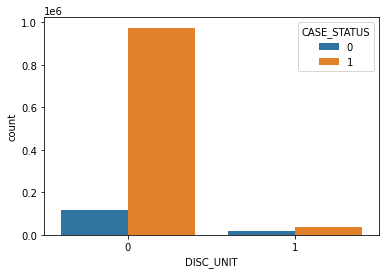

In [61]:
plt.figure(figsize=(12,10))
sns.countplot(x = "DISC_UNIT",data = df, hue = "CASE_STATUS")

<AxesSubplot:xlabel='YEAR'>

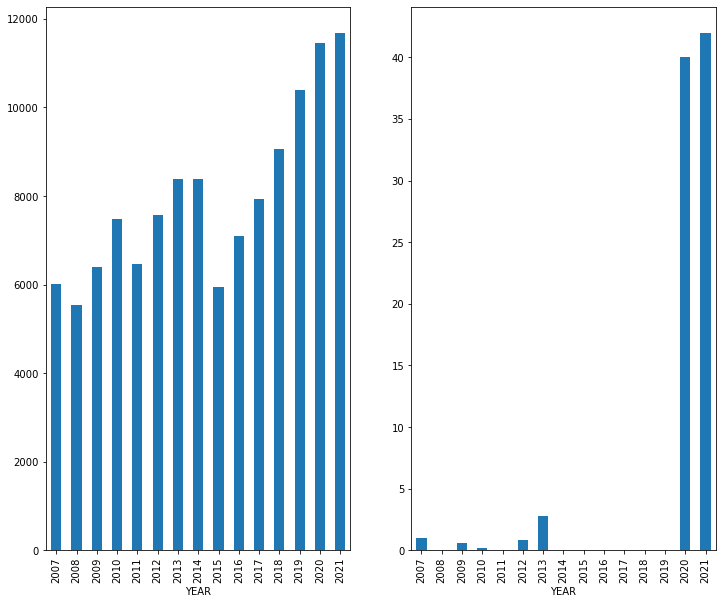

In [62]:
fig,axes = plt.subplots(ncols = 2, figsize = (12,10))
df.groupby("YEAR")["OW-PW"].mean().plot(ax = axes[0],kind = "bar")
df.groupby("YEAR")["OW-PW"].quantile(.5).plot(ax = axes[1],kind = "bar")

<AxesSubplot:>

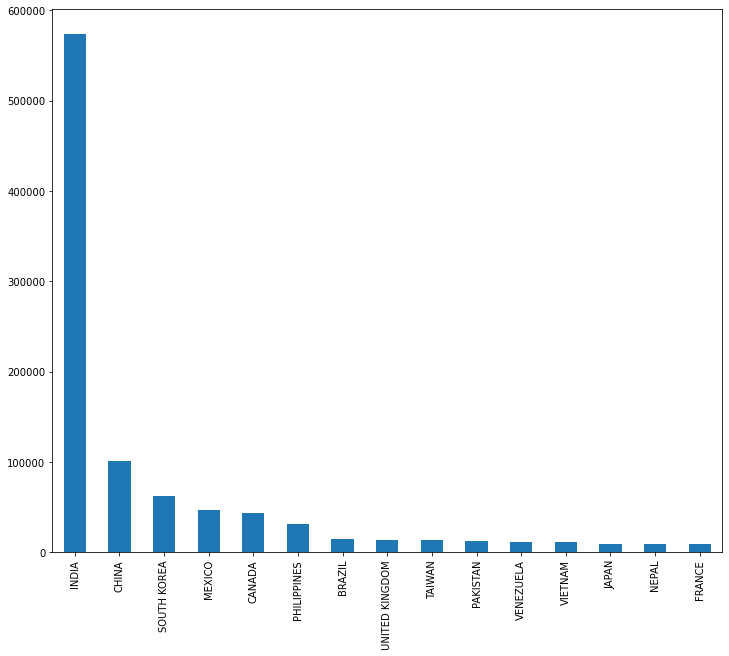

In [63]:
plt.figure(figsize = (12,10))
df["COUNTRY_OF_CITZENSHIP"].value_counts().nlargest(15).plot(kind = "bar")

<AxesSubplot:>

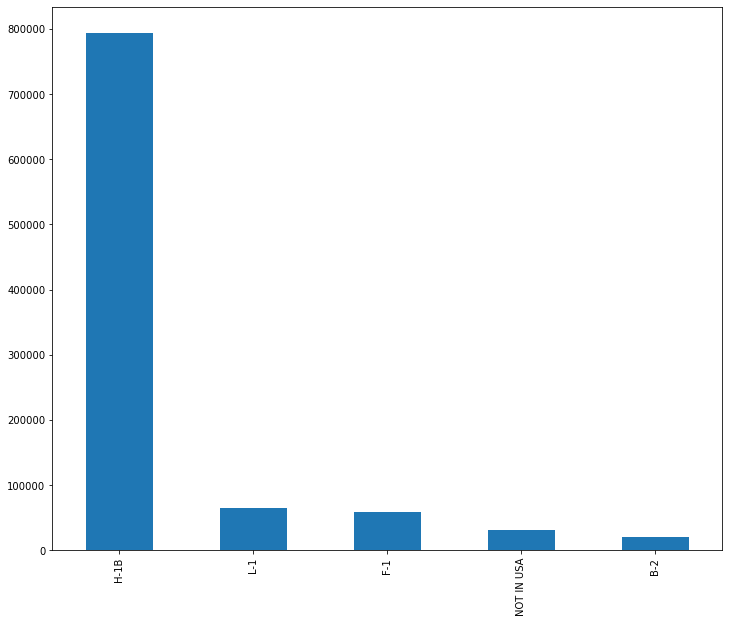

In [67]:
plt.figure(figsize = (12,10))
df["CLASS_OF_ADMISSION"].value_counts().nlargest(5).plot(kind = "bar")

<AxesSubplot:>

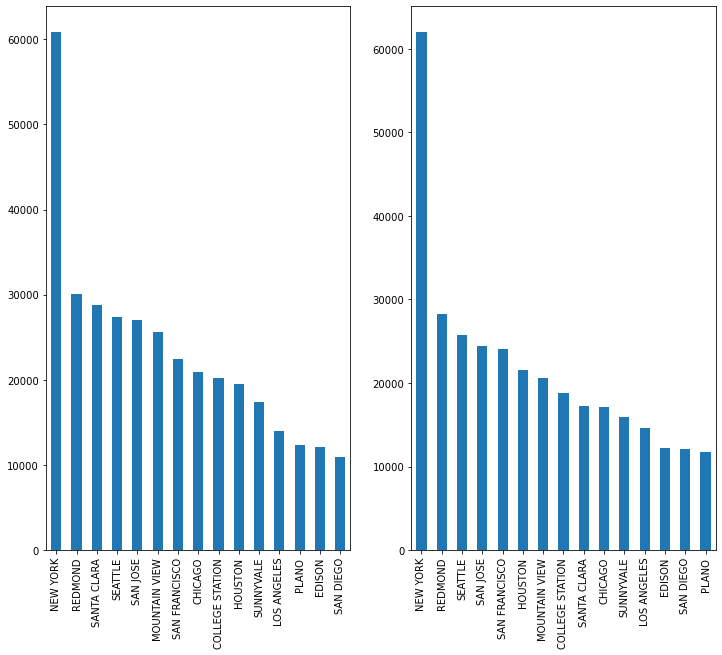

In [68]:
fig,axes = plt.subplots(ncols = 2, figsize = (12,10))
df["EMPLOYER_CITY"].value_counts().nlargest(15).plot(ax = axes[0],kind = "bar")
df["JOB_INFO_WORK_CITY"].value_counts().nlargest(15).plot(ax = axes[1],kind = "bar")

<AxesSubplot:>

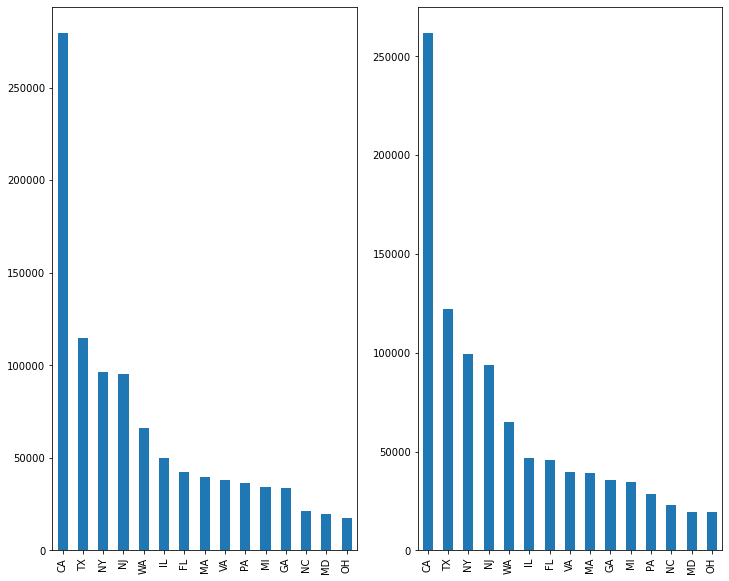

In [69]:
fig,axes = plt.subplots(ncols = 2, figsize = (12,10))
df["EMPLOYER_STATE"].value_counts().nlargest(15).plot(ax = axes[0], kind = "bar")
df["JOB_INFO_WORK_STATE"].value_counts().nlargest(15).plot(ax = axes[1], kind = "bar")

<AxesSubplot:xlabel='DISC_ST', ylabel='count'>

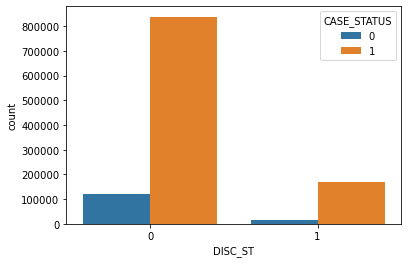

In [72]:
sns.countplot( x = "DISC_ST", hue = "CASE_STATUS", data = df)

<AxesSubplot:xlabel='DISC_CTY', ylabel='count'>

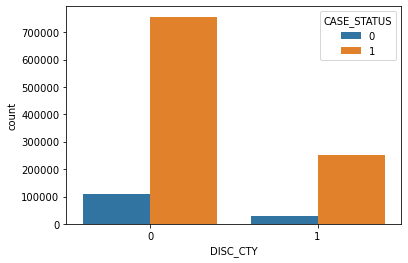

In [73]:
sns.countplot( x = "DISC_CTY", hue = "CASE_STATUS", data = df)

In [74]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
       'PW_LEVEL_9089', 'PW_AMOUNT_9089', 'PW_UNIT_OF_PAY_9089',
       'WAGE_OFFER_FROM_9089', 'WAGE_OFFER_UNIT_OF_PAY_9089',
       'JOB_INFO_WORK_CITY', 'JOB_INFO_WORK_STATE', 'COUNTRY_OF_CITZENSHIP',
       'CLASS_OF_ADMISSION', 'PW_SOC_CODE', 'MONTH', 'YEAR', 'WO_A', 'PW_A',
       'OW-PW', 'DISC_ST', 'DISC_CTY', 'DISC_UNIT'],
      dtype='object')